Lab Assignment 4 - Web Scraping

> **Instructions**
>
> Please complete the exercises below. Submit your completed assignment
> as a PDF, HTML or Word document outputted by knitr or compiled
> manually showing both the code and output. (It should be in a similar
> format to this document).

*Note that in this document code blocks are shown with a grey background
and output from running the code blocks is displayed with \## preceding
the output.*

> There may be some packages used in this assignment that you have not
> yet installed. In many cases the instructions are to “modify” the code
> provided, and it is implied in all cases that you should make sure the
> modified code successfully runs on your computer.
>
> In this assignment you will implement web scraping. Forums are good
> candidates for web scraping. In the first part of this assignment,
> we’ll work through web scraping threads on a forum about depression.
>
> Take a look at the website we will scrape:
>
> Note what happens when you change “page-1” to “page-2” in the URL (you
> get another set of results). That means we can iterate over different
> URLs (with different page numbers) to get a lot of data.
>
> The information shown on this site could potentially serve as a useful
> data source. Before we can devise the code to scrape this site, we
> need to get an idea of the underling HTML.
>
> **1. Look at the HTML that underlies each forum thread box. Identify
> the name of the class that the the first forum thread box belongs
> to.**
>
> Below shows an example of what I mean by the “forum thread box”:

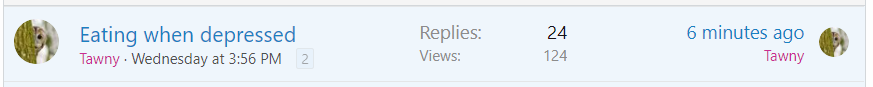

> Hint: to see the underlying HTML in the Google Chrome browser, just
> right-click on the element of interest and click “Inspect”. If you are
> not using Chrome, see for information on how it works in other
> browsers if you cannot find it.

1

> Now let’s start assembling the code to scrape the thread boxes. We’ll
> use the library *rvest*. First we construct the url:

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>library</strong>(rvest)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>page &lt;- 1 <em>#we'll use this later to update the page
number</em></p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>url &lt;-
<strong>paste0</strong>("https://www.mentalhealthforum.net/forum/forums/depression-forum.366/page-",
page)<br />
url</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> \## \[1\]
> "https://www.mentalhealthforum.net/forum/forums/depression-forum.366/page-1"
>
> That looks good. You can always try it in your browser to check if
> it’s functional. Next, let’s make the request to the server to
> retreive the HTML:

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><em>#request and load in the html document:</em><br />
html &lt;- <strong>read_html</strong>(url)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> Now we have the same HTML loaded in R that the browser would receive.
> Our next step is to extract the information we want from the HTML.
> Let’s start by extracting the title of the first thread:

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><em>#extract the threads from the html using html_nodes() by
identifing the class:</em> threads &lt;- html <strong>%&gt;%
html_nodes</strong>(".structItem")<br />
threads[1]</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> \## {xml_nodeset (1)}  
> \## \[1\] \<div class="structItem structItem--thread
> js-inlineModContainer js-thread ...

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><em>#now take the first thread (threads[1]) and extract the title
text ##using the class of the title element:</em><br />
title &lt;- threads[1] <strong>%&gt;%
html_nodes</strong>(".structItem-title") <strong>%&gt;%
html_text</strong>() title</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

\## \[1\] "\n\t\t\t\t\n\t\t\t\t\n\t\t\t\tAnxiety and Depression: Which
one do I have?\n\t\t\t"

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><em>#the title's are a little messy with hidden characters so let's
clean them:</em><br />
cleanFun &lt;- <strong>function</strong>(htmlString)
{<strong>return</strong>(<strong>gsub</strong>("[\t\n]", "",
htmlString))}<br />
<em>#It's okay if you don't fully understand gsub() right now, it's a
complicated function</em> <strong>cleanFun</strong>(title)<em>#show the
cleaned title</em></p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> \## \[1\] "Anxiety and Depression: Which one do I have?"
>
> Okay, that is a good start. We successfully extracted the first title.
> Before we move on, let me point out where you can find in the HTML
> that “structItem-title” is the class for the title ele-ment. Look at
> the HTML shown directly below, this is the HTML for a title element.
> (You can find it using the Inspect feature of your web browser). You
> can see the class identified in the first line:
>
> <img
> src="attachment:vertopal_5e3be39bb25c4118b7b8d84255573cda/media/image2.png"
> style="width:6.5in;height:0.70139in" />

2

> Below is the R code to extract other elements from the thread box. I
> just use the variable *i* here so it will be easier to incorporate
> this code into a loop later. Try to familiarize yourself with what
> each line is doing, and inspect the HTML using your web browser to
> identify how the code is extracting each piece of content.

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>i &lt;- 2</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>title &lt;- threads[i] <strong>%&gt;%
html_nodes</strong>(".structItem-title") <strong>%&gt;%
html_text</strong>() title &lt;- <strong>cleanFun</strong>(title)<br />
title</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> \## \[1\] "So stressed and worried"

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>replies &lt;- threads[i] <strong>%&gt;%
html_nodes</strong>(".pairs")<br />
replies &lt;- replies[[1]] <strong>%&gt;% html_nodes</strong>("dd")
<strong>%&gt;% html_text</strong>() replies</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> \## \[1\] "7"

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>views &lt;- threads[i] <strong>%&gt;%
html_nodes</strong>(".pairs")<br />
views &lt;- views[[2]] <strong>%&gt;% html_nodes</strong>("dd")
<strong>%&gt;% html_text</strong>()<em>#we access the second element
here ##because there are two elements with the class "pairs" and views
is second</em><br />
views</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> \## \[1\] "70"

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><em>#for timestamp we extract the "datetime" attribute rather than
the text</em> timestamp &lt;- threads[i] <strong>%&gt;%
html_nodes</strong>("time") <strong>%&gt;%
html_attr</strong>("datetime") timestamp &lt;- timestamp[1]<br />
timestamp</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> \## \[1\] "2020-10-01T19:52:45+0100"

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>new_row &lt;- <strong>data.frame</strong>(title, replies, views,
timestamp)<em>#combine in a single-row data frame</em> new_row</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><blockquote>
<p>## title replies views timestamp</p>
<p>## 1 So stressed and worried 7 70 2020-10-01T19:52:45+0100</p>
</blockquote></td>
</tr>
</tbody>
</table>

> **2. Take the code directly above and put it into a *for loop*. Make
> it loop over all threads that are on the first page and store the
> information into a new dataframe called *all_threads*.**
>
> This will be very similar to what you saw in the last assignment.
> Don’t loop over pages yet, we’ll do that later. *Hints*: your loop
> should change the value of the variable *i* on each iteration. You’ll
> also need to include an rbind(). Don’t forget to add Sys.sleep(2), as
> we do not want to query a website too quickly (just like with APIs).

3

> Now you should have some data that look like this:

<table>
<colgroup>
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>1<br />
2<br />
3<br />
4<br />
5</p>
</blockquote></th>
<th><blockquote>
<p>title<br />
Anxiety and Depression: Which one do I have?</p>
<p>So stressed and worried<br />
A topic for people who deal with loneliness Eating when depressed<br />
tired</p>
</blockquote></th>
<th><blockquote>
<p>replies 72<br />
7<br />
21<br />
25<br />
4</p>
</blockquote></th>
<th><blockquote>
<p>views 61K<br />
70<br />
351<br />
150<br />
49</p>
</blockquote></th>
<th><blockquote>
<p>timestamp<br />
2012-01-04T01:18:39+0000 2020-10-01T19:52:45+0100
2020-08-14T08:50:06+0100 2020-09-30T15:56:04+0100
2020-09-30T20:06:38+0100</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> **3. Modify the code you created so that there is an additional
> higher-level loop added that iterates over the first 50 pages.**
>
> *Hints*: You should change the *page* variable each time in this new
> loop, and embed the loop you created just before within in. Remember
> to think about where the blank data frame *all_threads* should be
> created. You should have about 1,250 rows when you’re done.
>
> We now have a lot of data. Let’s clean it up a bit and then explore it
> some. The code below cleans up the data frame by specifying the column
> classes (R class, not HTML class). It also creates a simple date
> variable from the timestamp, and then a day-of-the-week variable.

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>all_threads<strong>$</strong>views &lt;-
<strong>as.numeric</strong>(all_threads<strong>$</strong>views)<br />
<em>#note we just are ignoring that some have a "K" for now in the views
numbers</em> all_threads<strong>$</strong>replies &lt;-
<strong>as.numeric</strong>(all_threads<strong>$</strong>replies)<br />
all_threads<strong>$</strong>date &lt;-
<strong>as.Date</strong>(all_threads<strong>$</strong>timestamp)<br />
all_threads<strong>$</strong>title &lt;-
<strong>as.character</strong>(all_threads<strong>$</strong>title)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>all_threads<strong>$</strong>weekday &lt;-
<strong>weekdays</strong>(all_threads<strong>$</strong>date)<br />
<em>#indicate the correct order for the days of the week:</em><br />
all_threads<strong>$</strong>weekday &lt;-
<strong>factor</strong>(all_threads<strong>$</strong>weekday,<br />
levels=<strong>c</strong>("Saturday", "Sunday", "Monday", "Tuesday",
"Wednesday", "Thursday", "Friday"))</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> Let’s take a quick look at how the number of new threads varies by the
> day of the week:

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>library</strong>(ggplot2)<br />
<strong>ggplot</strong>(all_threads, <strong>aes</strong>(weekday))
<strong>+ geom_bar</strong>(stat="count")</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

4

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>20</p>
</blockquote>
<table>
<colgroup>
<col style="width: 12%" />
<col style="width: 12%" />
<col style="width: 12%" />
<col style="width: 12%" />
<col style="width: 12%" />
<col style="width: 12%" />
<col style="width: 12%" />
<col style="width: 12%" />
</colgroup>
<thead>
<tr class="header">
<th colspan="8">count</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>
</tbody>
</table></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> Later in the course, we’ll go into depth on sentiment analysis. For
> right now, let’s just run a quick and simple sentiment function in R.
> The function *analyzeSentiment()* runs several dictionary methods on
> the text that is inputted to it to perform simple sentiment analyses.

<table>
<colgroup>
<col style="width: 25%" />
<col style="width: 25%" />
<col style="width: 25%" />
<col style="width: 25%" />
</colgroup>
<thead>
<tr class="header">
<th colspan="4"><blockquote>
<p><strong>library</strong>(SentimentAnalysis)<br />
sentiment &lt;-
<strong>analyzeSentiment</strong>(all_threads<strong>$</strong>title)<br />
<strong>names</strong>(sentiment)<em>#show the column names outputted by
the sentiment function</em></p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>## ##</td>
<td><blockquote>
<p>[1] "WordCount"<br />
[4] "PositivityGI"</p>
</blockquote></td>
<td><blockquote>
<p>"SentimentGI" "SentimentHE"</p>
</blockquote></td>
<td><blockquote>
<p>"NegativityGI"<br />
"NegativityHE"</p>
</blockquote></td>
</tr>
<tr class="even">
<td colspan="2"><blockquote>
<p>## [7] "PositivityHE"</p>
<p>## [10] "PositivityLM"</p>
</blockquote></td>
<td colspan="2"><blockquote>
<p>"SentimentLM" "NegativityLM"</p>
<p>"RatioUncertaintyLM" "SentimentQDAP"</p>
</blockquote></td>
</tr>
<tr class="odd">
<td colspan="2"><blockquote>
<p>## [13] "NegativityQDAP"</p>
</blockquote></td>
<td colspan="2"><blockquote>
<p>"PositivityQDAP"</p>
</blockquote></td>
</tr>
</tbody>
</table>

Let’s just look at the mean sentiment detected by each of the dictionary
methods. Our textual data are thread titles from a depression forum, so
we would expect to see all negative sentiment estimates on average.

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>mean</strong>(sentiment<strong>$</strong>SentimentGI)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> \## \[1\] -0.1702822

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>mean</strong>(sentiment<strong>$</strong>SentimentHE)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> \## \[1\] -0.06735009

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>mean</strong>(sentiment<strong>$</strong>SentimentLM)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> \## \[1\] -0.1492945

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>mean</strong>(sentiment<strong>$</strong>SentimentQDAP)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> \## \[1\] -0.1498394
>
> The depression forum is only one of many mental health forums on this
> website. Take a look at the other forums that exist there.
>
> **6. Pick a different forum (e.g. the Anxiety Forum, Dementia Forum,
> etc.) from this website to scrape in the same way we scraped the
> depression forum. Scrape *all* of the pages that exist for it.**

6

> **7. Find a different website that you think would be a good candidate
> for web scraping. Provide the link to the website.**

It should be one that has data on it you could imagine extracting into
rows of data in a table. Take a look at the underlying HTML to get a
sense of how you might go about extracting the meaningful content with
rvest. Also consider if there is a way to page through the results by
systematically changing the URL.

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th colspan="2"></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><blockquote>
<p><strong>8.</strong> <strong>Take a look on the website you found for
its Terms of Use or the equivalent.</strong></p>
<p><strong>specify that users cannot scrape the website’s
data?</strong></p>
</blockquote></td>
<td><strong>Do they</strong></td>
</tr>
</tbody>
</table>

> Often websites do not have a statement “outlawing” web scraping, but
> sometimes they do. For example, in the Terms of Use for Craigslist (),
> they specify: “You agree not to copy/collect CL content via robots,
> spiders, scripts, scrapers, crawler any automated or manual equivalent
> (e.g., by hand).” When a website indicates that its data should not be
> scraped, we should abide by these terms.
>
> **9. Describe the similarities and differences between collecting data
> through web scraping and collecting data through APIs.**

7
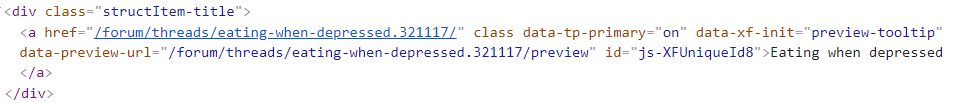